In [1]:
import numpy as np; from numpy import save; from numpy import load; from numpy import load
import matplotlib.pyplot as plt
import csv
import math
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.multiclass import OneVsRestClassifier

In [23]:
def readData(new_file, ref):
    with open(new_file,'r')as file:
        read_file = csv.reader(file)
        data = []

        for ele in read_file:
            data.append(ele)
    ## ref=1 when we want to read feature data
    ## ref=2 when we want to read label data
    if ref==1:
        feature_data = [] ; feature_label = []
        for item in data[1:-1]:
            feature_data.append(np.array([float(i) for i in item]))
        feature_data = np.vstack(feature_data)
        for item in data[0]:
            feature_label.append(item)
        feature_label = np.vstack(feature_label)
        return feature_data, feature_label
    
    if ref==2:
        label_data = []
        for item in data[1:-1]:
            label_data.append(np.array([float(i) for i in item]))
        label_data = np.vstack(label_data)
        return label_data 

def splitData(train_data):
    feature_train = train_data[:,:-1]
    label_train = train_data[:,-1]
    return feature_train, label_train

In [19]:
tr_feature, tr_feature_label = readData('NEWS_Training_data.csv',1)
tr_label = readData('NEWS_Training_label.csv',2)
tr_data = np.concatenate((tr_feature,tr_label), axis=1)

59


[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

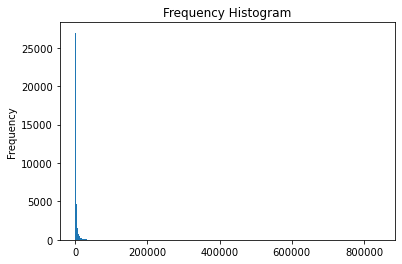

In [4]:
plt.hist(tr_label, bins=300)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

In [24]:
tr_label_std = np.std(tr_label)
tr_label_mean = np.mean(tr_label)
filter_train_data = []

for item in tr_data:
    if item[-1] < tr_label_mean + 2*tr_label_std:
        filter_train_data.append(item) 
        
filter_train_data = np.vstack(filter_train_data)

fil_tr_feature, fil_tr_label = splitData(filter_train_data)

[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

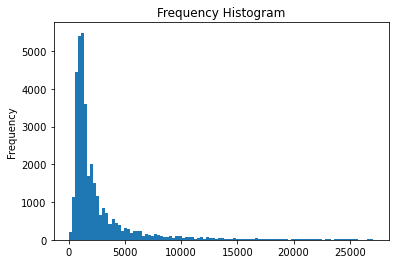

In [25]:
plt.hist(fil_tr_label, bins=100)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')